<a href="https://colab.research.google.com/github/psukphranee/Machine-Learning-Projects/blob/master/Building_a_Model_Using_Functional_API_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Building a "Wide & Deep" model with the California Housing Dataset

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras


fetch housing data.
split it into training, validation, and test sets

In [40]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
display(X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape)

(15480, 8)

(5160, 8)

(15480,)

(5160,)

In [42]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [44]:
#build the "Wide & Deep" model

input_ = keras.layers.Input(shape=X_train.shape[1:])

hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_, hidden2])

output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])

In [45]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_21 (Dense)            (None, 30)                   270       ['input_8[0][0]']             
                                                                                                  
 dense_22 (Dense)            (None, 30)                   930       ['dense_21[0][0]']            
                                                                                                  
 concatenate_7 (Concatenate  (None, 38)                   0         ['input_8[0][0]',             
 )                                                                   'dense_22[0][0]']      

In [47]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [48]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.8728 - val_loss: 1.8981
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7365 - val_loss: 0.7891
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6539 - val_loss: 0.7940
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5978 - val_loss: 0.5926
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5581 - val_loss: 0.5180
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5270 - val_loss: 0.4837
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5038 - val_loss: 0.6232
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4846 - val_loss: 0.4475
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4704 - val_loss: 0.5108
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4581 - val_loss: 0.4302

<Axes: >

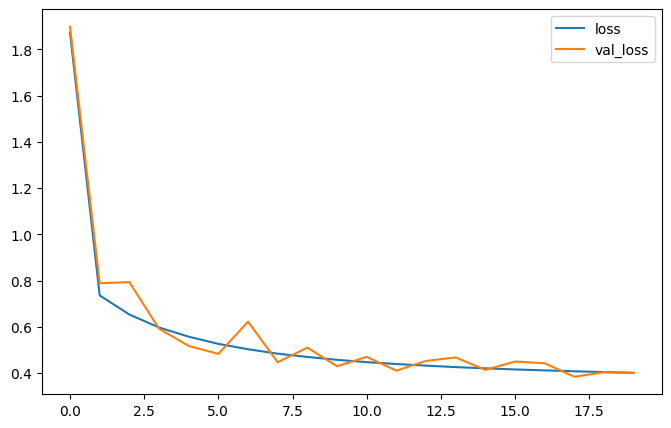

In [49]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [50]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.3926


In [53]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
display(y_pred, y_test[:3])

1/1 [==============================] - 0s 36ms/step


array([[0.6451947],
       [1.6279991],
       [3.3121336]], dtype=float32)

array([0.477  , 0.458  , 5.00001])